In [7]:
import pandas as pd
import pickle
from gensim import corpora, models
import gensim
from gensim.test.utils import datapath
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
from gensim.corpora import Dictionary
import pyLDAvis.gensim_models as gensimvis
from pathlib import Path
import seaborn as sns
import matplotlib.colors as mcolors
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import stop_words as sw

import warnings
warnings.filterwarnings("ignore")

/Users/admin/opt/miniconda3/envs/myenv/lib/python3.7/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/admin/opt/miniconda3/envs/myenv/lib/python3.7/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [8]:
bow_corpus = pickle.load(open('bow_corpus', 'rb'))

In [9]:
tokens = pickle.load(open('tokens', 'rb'))
dictionary = corpora.Dictionary(tokens)

In [29]:
lda_model_bow = gensim.models.LdaMulticore(bow_corpus, id2word=dictionary, num_topics = 15,passes=2,eval_every = None,
                random_state = 111, chunksize = 100)

In [30]:
temp_file = datapath("lda_model_bow")
lda_model_bow.save(temp_file)

In [31]:
pickle.dump(lda_model_bow, open("lda_model_bow", 'wb'))

In [32]:
lda_model_bow.print_topics()

[(0,
  '0.033*"taste" + 0.030*"like" + 0.024*"flavor" + 0.021*"good" + 0.017*"snack" + 0.016*"love" + 0.014*"sweet" + 0.013*"them" + 0.012*"chip" + 0.012*"eat"'),
 (1,
  '0.017*"great" + 0.015*"mix" + 0.014*"bread" + 0.014*"good" + 0.013*"taste" + 0.012*"like" + 0.011*"love" + 0.009*"delicious" + 0.009*"easy" + 0.009*"eat"'),
 (2,
  '0.013*"it" + 0.012*"bought" + 0.011*"got" + 0.010*"friend" + 0.010*"try" + 0.010*"time" + 0.009*"loved" + 0.009*"know" + 0.009*"day" + 0.008*"gift"'),
 (3,
  '0.014*"like" + 0.013*"little" + 0.012*"time" + 0.012*"work" + 0.011*"small" + 0.010*"size" + 0.009*"piece" + 0.009*"bag" + 0.009*"thing" + 0.009*"long"'),
 (4,
  '0.029*"tea" + 0.025*"water" + 0.022*"taste" + 0.020*"hot" + 0.018*"great" + 0.015*"use" + 0.015*"flavor" + 0.013*"like" + 0.012*"good" + 0.012*"drink"'),
 (5,
  '0.054*"love" + 0.032*"dog" + 0.030*"food" + 0.029*"treat" + 0.024*"great" + 0.020*"recommend" + 0.019*"healthy" + 0.019*"highly" + 0.018*"old" + 0.017*"them"'),
 (6,
  '0.066*"coff

In [ ]:
for i in lda.show_topics(topn=len(dictionary)):
    print i

In [60]:
dct = Dictionary.from_corpus(bow_corpus,id2word = dictionary)
vis = gensimvis.prepare(lda_model_bow,bow_corpus,dictionary = dct,sort_topics = False)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.093893  0.004772       1        1   6.843434
1      0.096050 -0.013766       2        1   6.314812
2     -0.142070  0.022097       3        1   8.324204
3     -0.083545 -0.056377       4        1   7.639903
4      0.119653  0.078295       5        1   6.507209
5     -0.035738 -0.241357       6        1   4.305363
6      0.102086  0.075293       7        1   6.505156
7      0.053791  0.045296       8        1  11.741058
8     -0.165160  0.131153       9        1   4.597691
9     -0.171144 -0.127756      10        1   5.756929
10     0.180177  0.090040      11        1   3.035836
11     0.195166 -0.166421      12        1   2.849755
12    -0.141300  0.068226      13        1   9.544896
13    -0.147315  0.037526      14        1   8.441783
14     0.045456  0.052978      15        1   7.591971, topic_info=       Term          Freq          Tota

In [183]:
cr_score = []
topics = range(5,22,1)

In [184]:
for topic in topics:
    file_name = "lda_model_bow_" + str(topic)
    path = Path(file_name)
    file_name_umass = "coh_val_" + str(topic)
    if path.is_file():
#         lda_model = pickle.load(open(file_name, 'rb'))
        coh_val = pickle.load(open(file_name_umass, 'rb'))
        cr_score.append(coh_val)
    else:  
        lda_model = models.LdaMulticore(corpus = bow_corpus,id2word = dictionary, num_topics = topic,eval_every = None,passes=3)
        umass_metric = CoherenceModel(model = lda_model,corpus = bow_corpus,coherence = "u_mass")
        coh_val = umass_metric.get_coherence()
        pickle.dump(lda_model, open(file_name, 'wb'))
        pickle.dump(coh_val, open(file_name_umass, 'wb'))
        cr_score.append(umass_metric.get_coherence())

In [185]:
cr_score

[-2.631733496538159,
 -2.6690060319499023,
 -2.688616290920199,
 -2.7234378567629896,
 -2.808099792255102,
 -2.796268280360193,
 -2.851585057433452,
 -2.809399133995957,
 -2.8251158063363038,
 -3.107736166495545,
 -2.9466574220543853,
 -3.1908121327945533,
 -2.9137227777148498,
 -3.06616479980123,
 -2.830501093158642,
 -2.927766909538218,
 -3.1007780379064305]

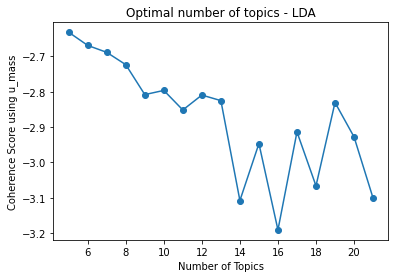

In [186]:
plt.figure()
plt.plot(topics,cr_score,marker = "o")
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score using u_mass")
plt.title("Optimal number of topics - LDA") 
plt.show()

In [169]:
cr_score_final

[-2.866927259538919,
 -3.2207790025498744,
 -2.947009788095733,
 -3.110399739020073,
 -2.456736775050825,
 -2.4319989084180804,
 -2.579372326971188]

In [64]:
load_model_bow = pickle.load(open('lda_model_bow', 'rb'))

In [65]:
load_model_bow.print_topics()

[(0,
  '0.033*"taste" + 0.030*"like" + 0.024*"flavor" + 0.021*"good" + 0.017*"snack" + 0.016*"love" + 0.014*"sweet" + 0.013*"them" + 0.012*"chip" + 0.012*"eat"'),
 (1,
  '0.017*"great" + 0.015*"mix" + 0.014*"bread" + 0.014*"good" + 0.013*"taste" + 0.012*"like" + 0.011*"love" + 0.009*"delicious" + 0.009*"easy" + 0.009*"eat"'),
 (2,
  '0.013*"it" + 0.012*"bought" + 0.011*"got" + 0.010*"friend" + 0.010*"try" + 0.010*"time" + 0.009*"loved" + 0.009*"know" + 0.009*"day" + 0.008*"gift"'),
 (3,
  '0.014*"like" + 0.013*"little" + 0.012*"time" + 0.012*"work" + 0.011*"small" + 0.010*"size" + 0.009*"piece" + 0.009*"bag" + 0.009*"thing" + 0.009*"long"'),
 (4,
  '0.029*"tea" + 0.025*"water" + 0.022*"taste" + 0.020*"hot" + 0.018*"great" + 0.015*"use" + 0.015*"flavor" + 0.013*"like" + 0.012*"good" + 0.012*"drink"'),
 (5,
  '0.054*"love" + 0.032*"dog" + 0.030*"food" + 0.029*"treat" + 0.024*"great" + 0.020*"recommend" + 0.019*"healthy" + 0.019*"highly" + 0.018*"old" + 0.017*"them"'),
 (6,
  '0.066*"coff

In [6]:
df = pd.read_csv("clean_review.csv")
df.head()

,text,score,text_clean
0,bought vitality canned dog food product good q...,5,vitality canned dog stew processed meat smell ...
1,product arrived labeled jumbo salted peanut th...,1,arrived labeled jumbo salted peanut peanut sma...
2,confection century light pillowy citrus gelati...,4,confection century light pillowy citrus gelati...
3,looking secret ingredient robitussin believe i...,2,secret ingredient robitussin addition root bee...
4,great taffy great price wide assortment yummy ...,5,taffy wide assortment taffy delivery quick taf...


In [12]:
file_name = "lda_model_bow_5"
lda_model_5 = pickle.load(open(file_name, 'rb'))

In [ ]:
dom_df = pd.DataFrame(columns = ["dom_topic","perc_topic","keywords"])
dom_df["text"] = df["text"]

In [190]:
for i in range(len(bow_corpus)):
    topic,topic_perc = sorted(lda_model_5[bow_corpus[i]],key = lambda x:x[1],reverse = True)[0]
    topic_keywords = ', '.join([word for word,word_perc in lda_model_5.show_topic(topic)])
    doc_topic_dist = pd.Series([topic,topic_perc,topic_keywords])
    dom_df.at[i,"dom_topic"],dom_df.at[i,"perc_topic"],dom_df.at[i,"keywords"] = doc_topic_dist

In [191]:
dom_df.to_csv("dom.csv", encoding='utf-8', index=False)

In [229]:
dom_df.head(5)

,dom_topic,perc_topic,keywords,text
0,4,0.774912,"dog, treat, cat, day, time, year, month, probl...",bought vitality canned dog food product good q...
1,2,0.85408,"time, ordered, bag, year, received, arrived, g...",product arrived labeled jumbo salted peanut th...
2,2,0.406789,"time, ordered, bag, year, received, arrived, g...",confection century light pillowy citrus gelati...
3,3,0.810945,"sweet, sugar, snack, chocolate, calorie, milk,...",looking secret ingredient robitussin believe i...
4,2,0.898197,"time, ordered, bag, year, received, arrived, g...",great taffy great price wide assortment yummy ...


In [197]:
dom_df.sort_values('perc_topic', ascending=False).head(5).to_clipboard(excel=True)

In [202]:
topic_dist = pd.DataFrame(columns = ["topic_keys","total_docs","perc_docs"])
topic_dist.topic_no = range(5)
for i in range(5):
    topic_dist.at[i,"topic_keys"] = ', '.join([word for word,perc in lda_model_15.show_topic(i)])
topic_dist.total_docs = dom_df["dom_topic"].value_counts().sort_index()
topic_dist.perc_docs = (topic_dist.total_docs/topic_dist.total_docs.sum())*100
topic_dist

,topic_keys,total_docs,perc_docs
0,"coffee, cup, flavor, taste, like, good, bean, ...",61907,15.674484
1,"store, amazon, price, local, grocery, buy, pro...",75701,19.167042
2,"use, product, work, bottle, like, hair, nice, ...",103931,26.314710
3,"salt, popcorn, oil, cheese, taste, flavor, lik...",87735,22.213979
4,"mix, chocolate, butter, taste, great, best, us...",65680,16.629785


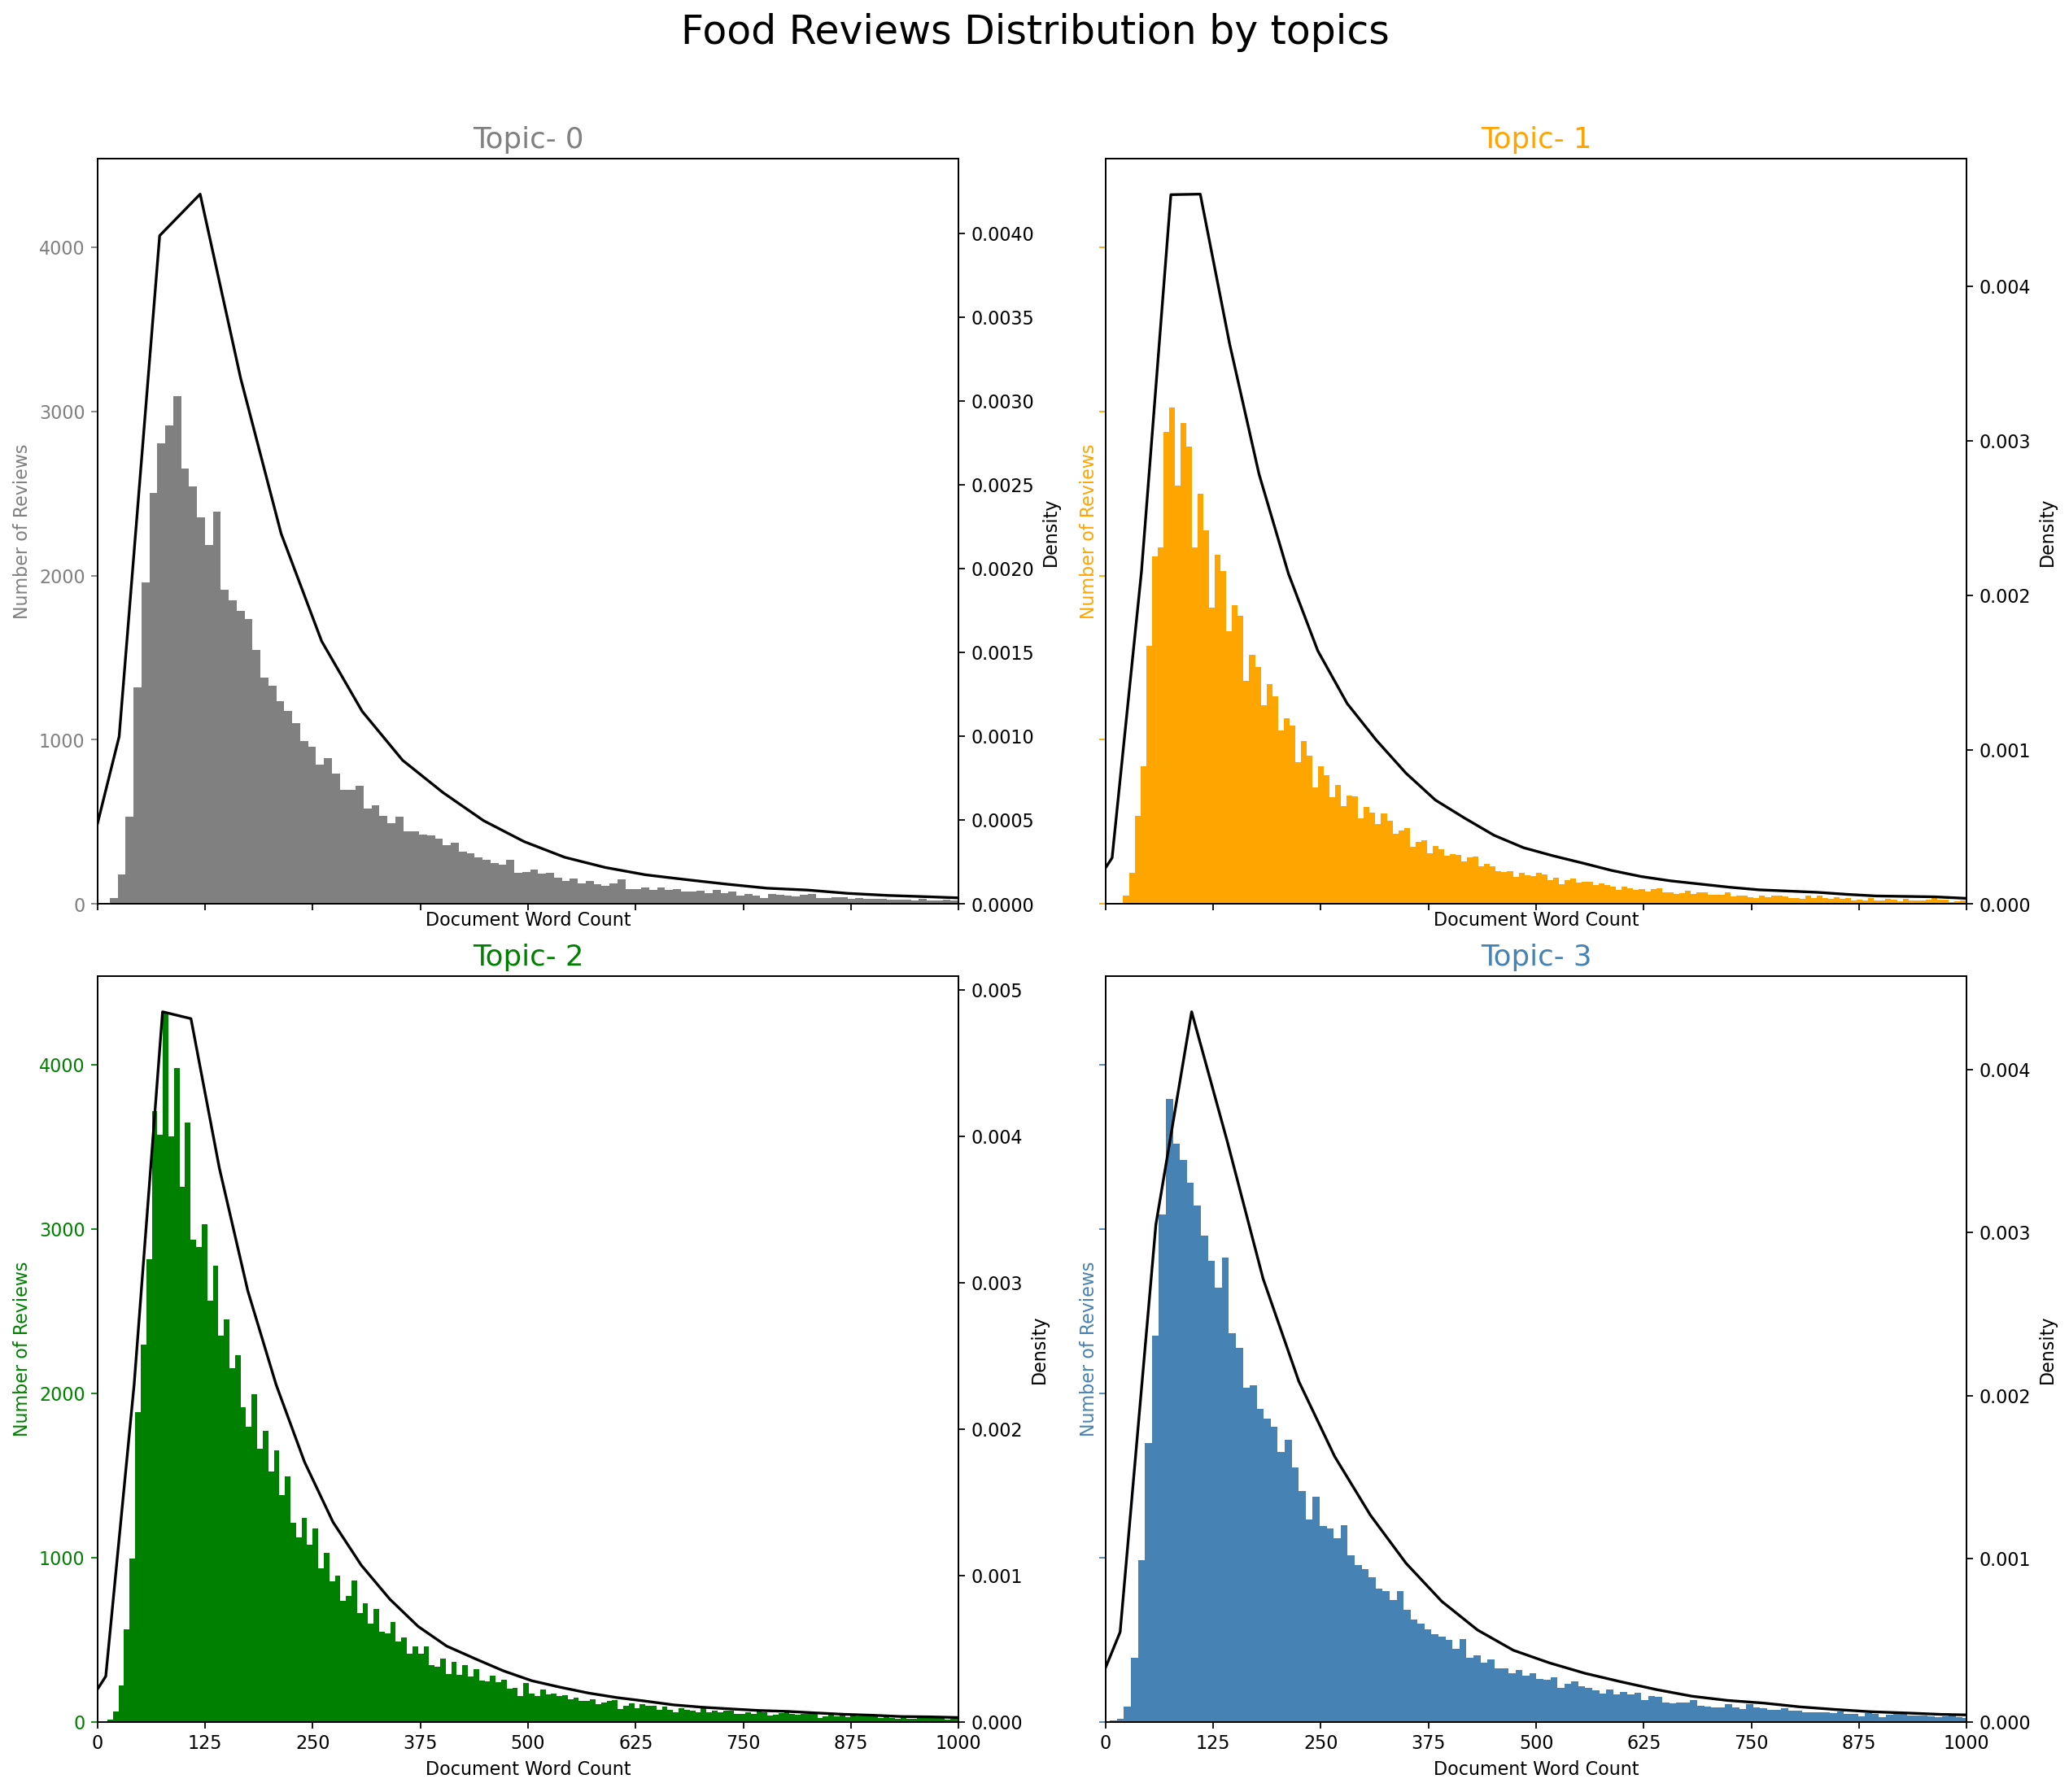

In [203]:
cols = ['gray','orange','green','steelblue']
fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = dom_df.loc[dom_df["dom_topic"] == i, :]
    doc_lens = df_dominant_topic_sub['text'].str.len()
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Reviews', color=cols[i])
    ax.set_title('Topic- '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Food Reviews Distribution by topics', fontsize=22)
plt.show()

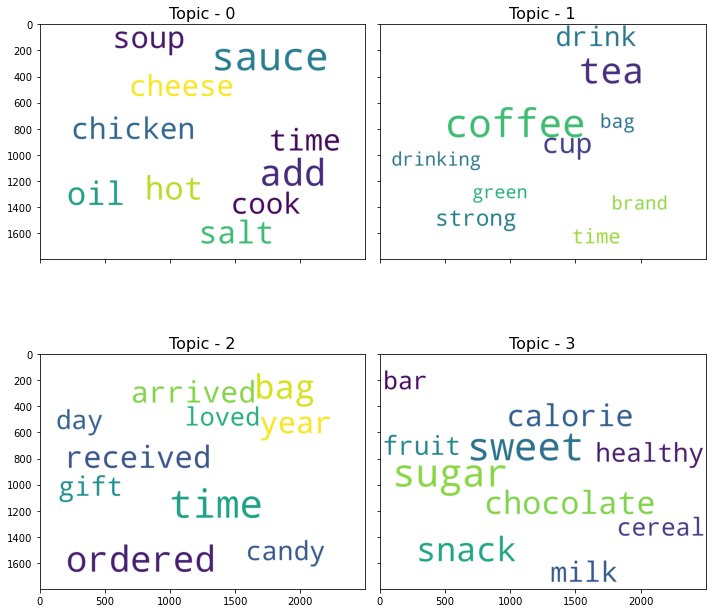

In [55]:
cols = [ 'green','orange','gold','blue']

wordcloud = WordCloud(stopwords=sw.get_stopwords(),background_color="white", max_words=5000,width=2500,height=1800,
                      contour_width=3, contour_color=cols,prefer_horizontal=1.0)

topics = lda_model_5.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    wordcloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(wordcloud)
    plt.gca().set_title('Topic - ' + str(i), fontdict=dict(size=16))
    

plt.subplots_adjust(wspace=0, hspace=0)
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [20]:
from collections import OrderedDict
def get_doc_topic_dist(model, corpus, kwords=False):
    top_dist =[]
    keys = []

    for d in corpus:
        tmp = {i:0 for i in range(5)}
        tmp.update(dict(model[d]))
        vals = list(OrderedDict(tmp).values())
        top_dist += [np.array(vals)]
        if kwords:
            keys += [np.array(vals).argmax()]

    return np.array(top_dist), keys

In [21]:
top_dist, lda_keys= get_doc_topic_dist(lda_model_5, bow_corpus, True)

In [22]:
top_dist

array([[0.17010543, 0.01841344, 0.01822954, 0.01835041, 0.77490115],
       [0.01564301, 0.01547413, 0.85422635, 0.09909081, 0.0155657 ],
       [0.20323394, 0.        , 0.40679172, 0.37696296, 0.        ],
       ...,
       [0.01029127, 0.01016355, 0.01013131, 0.1422229 , 0.827191  ],
       [0.01454775, 0.01434799, 0.01443011, 0.20079626, 0.75587791],
       [0.18162356, 0.02546612, 0.02625645, 0.74127328, 0.02538058]])

In [23]:
from gensim.parsing.preprocessing import preprocess_string, strip_punctuation, strip_numeric

top_3_wor = lda_model_5.print_topics(num_topics=5, num_words=3)
top_3_wor
# .show_topics()
topics = []
filters = [lambda x: x.lower(), strip_punctuation, strip_numeric]

for topic in top_3_wor:
    topics.append(preprocess_string(topic[1], filters))

print(topics)
top_3_words = []
for topic in topics:
    join_str = " ".join(topic)
    top_3_words.append(join_str)

[['sauce', 'add', 'oil'], ['coffee', 'tea', 'cup'], ['time', 'ordered', 'bag'], ['sweet', 'sugar', 'snack'], ['dog', 'treat', 'cat']]


In [24]:
top_3_words

['sauce add oil',
 'coffee tea cup',
 'time ordered bag',
 'sweet sugar snack',
 'dog treat cat']

In [25]:
def keys_to_counts(keys):
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

lda_categories, lda_counts = keys_to_counts(lda_keys)

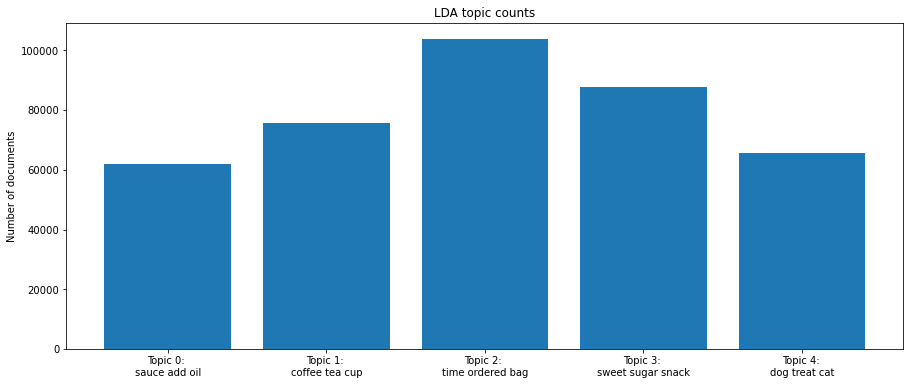

In [26]:
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lda_categories]

fig, ax = plt.subplots(figsize=(15,6))
ax.bar(lda_categories, lda_counts);
ax.set_xticks(lda_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of documents');
ax.set_title('LDA topic counts');
plt.show()

In [88]:
print('\nPerplexity: ', lda_model_5.log_perplexity(bow_corpus))  


Perplexity:  -8.178587531195483


In [210]:
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(lda_model_5, bow_corpus, dictionary=lda_model_5.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.091029 -0.015316       1        1  23.207735
3     -0.123266  0.102083       2        1  21.787056
4      0.173085  0.079082       3        1  20.948242
1     -0.017780 -0.191103       4        1  17.902244
0     -0.123069  0.025255       5        1  16.154723, topic_info=        Term          Freq         Total Category  logprob  loglift
302   coffee  42434.000000  42434.000000  Default  30.0000  30.0000
797      tea  36929.000000  36929.000000  Default  29.0000  29.0000
2        dog  22597.000000  22597.000000  Default  28.0000  28.0000
49     sugar  27963.000000  27963.000000  Default  27.0000  27.0000
194    sweet  29345.000000  29345.000000  Default  26.0000  26.0000
..       ...           ...           ...      ...      ...      ...
394  grocery   5311.175942  15424.305563   Topic5  -5.4539   0.7568
74     brand   5921.614540  29653.652800   Topic5  -5.3451   0.2120
73       bit   5685.717637  27953.334657   Topic5  -5.3857   0.2304
457      lot   5139.659370  27441.336214   Topic5  -5.4867   0.1479
176     year   5098.228549  34850.958132   Topic5  -5.4948  -0.0992

[415 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1141      3  0.999666  active
398       1  0.005022     add
398       2  0.365296     add
398       3  0.012734     add
398       4  0.128844     add
...     ...       ...     ...
176       1  0.363950    year
176       2  0.049181    year
176       3  0.268888    year
176       4  0.171703    year
176       5  0.146280    year

[936 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 5, 2, 1])

In [27]:
from gensim.parsing.preprocessing import preprocess_string, strip_punctuation, strip_numeric
file_name = "lda_model_bow_" + str(5)

lda_model_9 = pickle.load(open(file_name, 'rb'))

lda_topics = lda_model_9.show_topics()

topics = []
filters = [lambda x: x.lower(), strip_punctuation, strip_numeric]

for topic in lda_topics:
    split_topic = str(topic[1]).split(" + ")
    topics.append(split_topic)

print(topics)

[['0.011*"sauce"', '0.010*"add"', '0.008*"oil"', '0.008*"hot"', '0.007*"salt"', '0.007*"soup"', '0.006*"time"', '0.006*"chicken"', '0.006*"cheese"', '0.006*"cook"'], ['0.031*"coffee"', '0.026*"tea"', '0.014*"cup"', '0.013*"drink"', '0.009*"strong"', '0.007*"time"', '0.006*"bag"', '0.006*"brand"', '0.006*"drinking"', '0.006*"green"'], ['0.012*"time"', '0.010*"ordered"', '0.009*"bag"', '0.007*"year"', '0.007*"received"', '0.007*"arrived"', '0.005*"gift"', '0.005*"candy"', '0.005*"day"', '0.005*"loved"'], ['0.016*"sweet"', '0.016*"sugar"', '0.011*"snack"', '0.010*"chocolate"', '0.009*"calorie"', '0.008*"milk"', '0.007*"fruit"', '0.006*"healthy"', '0.006*"bar"', '0.006*"cereal"'], ['0.014*"dog"', '0.008*"treat"', '0.007*"cat"', '0.007*"day"', '0.007*"time"', '0.006*"year"', '0.005*"month"', '0.005*"problem"', '0.005*"work"', '0.004*"ingredient"']]


In [28]:
num_of_topics = []
for i, top in enumerate(topics[0]):
  num_of_topics.append("topic" + str(i))

new_df = pd.DataFrame(topics, columns=num_of_topics)
new_df

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9
0,"0.011*""sauce""","0.010*""add""","0.008*""oil""","0.008*""hot""","0.007*""salt""","0.007*""soup""","0.006*""time""","0.006*""chicken""","0.006*""cheese""","0.006*""cook"""
1,"0.031*""coffee""","0.026*""tea""","0.014*""cup""","0.013*""drink""","0.009*""strong""","0.007*""time""","0.006*""bag""","0.006*""brand""","0.006*""drinking""","0.006*""green"""
2,"0.012*""time""","0.010*""ordered""","0.009*""bag""","0.007*""year""","0.007*""received""","0.007*""arrived""","0.005*""gift""","0.005*""candy""","0.005*""day""","0.005*""loved"""
3,"0.016*""sweet""","0.016*""sugar""","0.011*""snack""","0.010*""chocolate""","0.009*""calorie""","0.008*""milk""","0.007*""fruit""","0.006*""healthy""","0.006*""bar""","0.006*""cereal"""
4,"0.014*""dog""","0.008*""treat""","0.007*""cat""","0.007*""day""","0.007*""time""","0.006*""year""","0.005*""month""","0.005*""problem""","0.005*""work""","0.004*""ingredient"""


In [29]:
lda_model_9.show_topics()

[(0,
  '0.011*"sauce" + 0.010*"add" + 0.008*"oil" + 0.008*"hot" + 0.007*"salt" + 0.007*"soup" + 0.006*"time" + 0.006*"chicken" + 0.006*"cheese" + 0.006*"cook"'),
 (1,
  '0.031*"coffee" + 0.026*"tea" + 0.014*"cup" + 0.013*"drink" + 0.009*"strong" + 0.007*"time" + 0.006*"bag" + 0.006*"brand" + 0.006*"drinking" + 0.006*"green"'),
 (2,
  '0.012*"time" + 0.010*"ordered" + 0.009*"bag" + 0.007*"year" + 0.007*"received" + 0.007*"arrived" + 0.005*"gift" + 0.005*"candy" + 0.005*"day" + 0.005*"loved"'),
 (3,
  '0.016*"sweet" + 0.016*"sugar" + 0.011*"snack" + 0.010*"chocolate" + 0.009*"calorie" + 0.008*"milk" + 0.007*"fruit" + 0.006*"healthy" + 0.006*"bar" + 0.006*"cereal"'),
 (4,
  '0.014*"dog" + 0.008*"treat" + 0.007*"cat" + 0.007*"day" + 0.007*"time" + 0.006*"year" + 0.005*"month" + 0.005*"problem" + 0.005*"work" + 0.004*"ingredient"')]